# Projeto individual I

Author: Regina Lacerda Pinheiro Araújo

Email: lacerda.pinheiro@aluno.ifsp.edu.br

Date: Dez/2020

Description: Projeto Individual I - Análise Exploratória (INTI6) 259391] INTELIGÊNCIA ARTIFICIA

Dados obtidos do portal brasileiro de dados abertos: https://dados.gov.br/dataset/notificacao_covid

A escolha deste tema foi para entender um pouco a repeito do vírus que
desde janeiro de 2020 o mundo todo tem se mantido em estado de alerta contra uma nova ameaça de vírus que causa infecções respiratórias. O coronavírus provoca a doença denominada COVID-19, que em quadros mais leves, se manifesta como um resfriado comum e pode chegar a provocar, em quadros mais graves, síndromes respiratórias agudas, como a síndrome respiratória aguda grave.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [441]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Populating the interactive namespace from numpy and matplotlib


In [403]:
df = pd.read_csv('/content/drive/MyDrive/IA - Eletiva/Trabalho Indiviaual/covid.csv',sep=';')
print(df.shape)
df.head()

(1568570, 17)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [387]:
# verificando a quantidade de dados Nulos (NaN)
df.isnull().sum()

regiao                          0
estado                        311
municipio                   14540
coduf                           0
codmun                       8681
codRegiaoSaude              14540
nomeRegiaoSaude             14540
data                            0
semanaEpi                       0
populacaoTCU2019             5859
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          1568313
emAcompanhamentoNovos     1568313
interior/metropolitana      14540
dtype: int64

In [316]:
#mediana das colunas do dataframe
df.median()

coduf                          31.0
codmun                     314610.0
codRegiaoSaude              31059.0
semanaEpi                      33.0
populacaoTCU2019            11708.0
casosAcumulado                 55.0
casosNovos                      0.0
obitosAcumulado                 1.0
obitosNovos                     0.0
Recuperadosnovos          2848395.0
emAcompanhamentoNovos      507869.0
interior/metropolitana          0.0
dtype: float64

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568570 entries, 0 to 1568569
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1568570 non-null  object 
 1   estado                  1568259 non-null  object 
 2   municipio               1554030 non-null  object 
 3   coduf                   1568570 non-null  int64  
 4   codmun                  1559889 non-null  float64
 5   codRegiaoSaude          1554030 non-null  float64
 6   nomeRegiaoSaude         1554030 non-null  object 
 7   data                    1568570 non-null  object 
 8   semanaEpi               1568570 non-null  int64  
 9   populacaoTCU2019        1562711 non-null  float64
 10  casosAcumulado          1568570 non-null  int64  
 11  casosNovos              1568570 non-null  int64  
 12  obitosAcumulado         1568570 non-null  int64  
 13  obitosNovos             1568570 non-null  int64  
 14  Re

In [249]:
#verificando os estados com índices únicos
df.estado.unique()

array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

In [250]:
df.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

In [406]:
df['data']= pd.to_datetime(df['data'])
df['data']

0         2020-02-25
1         2020-02-26
2         2020-02-27
3         2020-02-28
4         2020-02-29
             ...    
1568565   2020-12-26
1568566   2020-12-27
1568567   2020-12-28
1568568   2020-12-29
1568569   2020-12-30
Name: data, Length: 1568570, dtype: datetime64[ns]

In [412]:
df['data'] = pd.to_datetime(df['data'],format='%Y-%m-%d') # date parse
df['year'] = df['data'].dt.year # year
df['month'] = df['data'].dt.month # month
df['day'] = df['data'].dt.day # day
df['year'] = df['year'].fillna(0.0).astype(int)
df['month'] = df['month'].fillna(0.0).astype(int)
df['day'] = df['day'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

In [253]:
df.obitosAcumulado.sum()

80824309

In [254]:
df.casosAcumulado.sum()

2657257194

In [255]:
df.obitosNovos.sum()

581625

In [256]:
df.casosNovos.sum()

22857600

In [319]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana',
       'year', 'month', 'day'],
      dtype='object')

In [320]:
# Casos ativos = Casos Acumulados - Mortes - Casos Recuperados
df['ativos'] = (df['casosAcumulado'] + df['casosNovos']) - (df['obitosAcumulado'] - df['obitosNovos'] - df['Recuperadosnovos'])

In [259]:
df['ativos'].sum()

1607601248.0

In [390]:
df['qtdemortes'] = df['obitosAcumulado'] + df['obitosNovos']

In [391]:
df['totalcasos'] = df['casosAcumulado']+ df['casosNovos'].sum()

In [392]:
 #criando a coluna com a quantidade de mortes por estado
 df['qtdemortes'] = df.groupby(['estado'])['qtdemortes'].transform('count')

In [393]:
 #criando a coluna com a total de casos  por estado
 df['totalcasos'] = df.groupby(['estado'])['totalcasos'].transform('count')

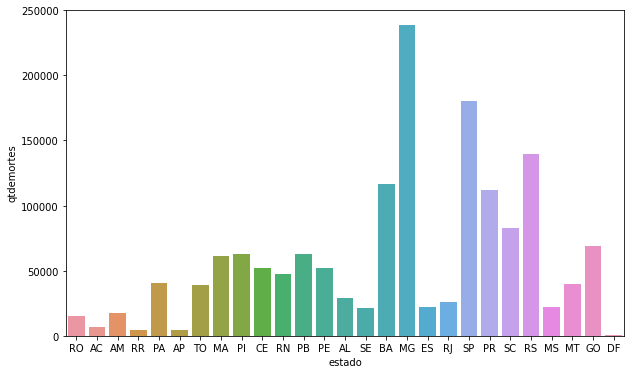

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot( x='estado', y='qtdemortes',data=df)


In [339]:
mortes = df['qtdemortes'].value_counts()

In [85]:
mortes.index

Int64Index([238576, 180544, 139252, 116932, 111910,  82894,  69223,  63085,
             62806,  61132,  52204,  51925,  47182,  22351,  40486,  39928,
             39370,  29047,  26257,  21514,  17608,  15408,   4774,   6448,
               589],
           dtype='int64')

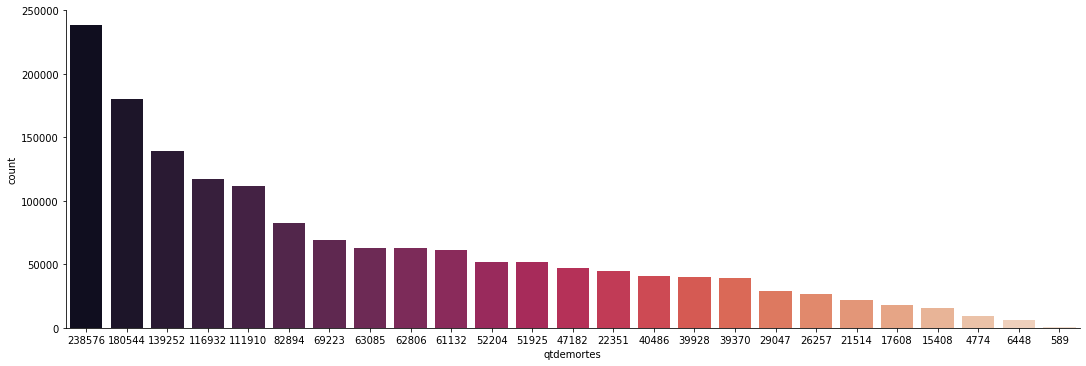

In [94]:
sns.catplot(data=df, kind='count', x='qtdemortes', aspect=3, order=mortes.index,palette='rocket')

In [33]:
contagem.index

Index(['MG', 'SP', 'RS', 'BA', 'PR', 'SC', 'GO', 'PI', 'PB', 'MA', 'PE', 'CE',
       'RN', 'PA', 'MT', 'TO', 'AL', 'RJ', 'MS', 'ES', 'SE', 'AM', 'RO', 'AC',
       'RR', 'AP', 'DF'],
      dtype='object')

In [32]:

contagem = df['estado'].value_counts()


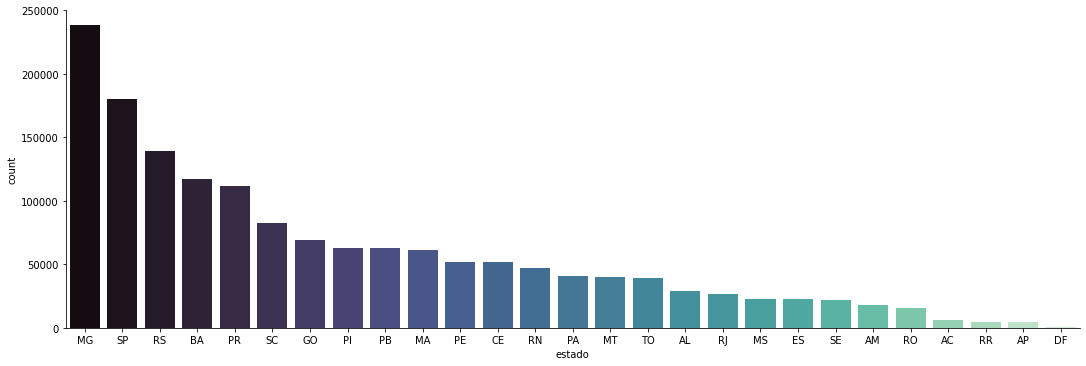

In [88]:
# Estado com maior numero de mortes
sns.catplot(data=df, kind='count', x='estado', aspect=3, order=contagem.index,palette='mako')

In [39]:
df.loc[df.month== 1,'month']="Janeiro"
df.loc[df.month== 2,'month']="Fevereiro"
df.loc[df.month== 3,'month']="Março"
df.loc[df.month== 4,'month']="Abril"
df.loc[df.month== 5,'month']="Maio"
df.loc[df.month== 6,'month']="Junho"
df.loc[df.month== 7,'month']="Julho"
df.loc[df.month== 8,'month']="Agosto"
df.loc[df.month== 9,'month']="Setembro"
df.loc[df.month== 10,'month']="Outubro"
df.loc[df.month== 11,'month']="Novembro"
df.loc[df.month== 12,'month']="Dezembro"


### Agrupando dados

In [126]:
df.head(3)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,year,month,day,ativos,qtdemortes,totalcasos
0,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-25,9,210147125.0,0,0,0,0,22130.0,14062.0,0.0,2020,2,25,22130.0,15408,15408
1,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-26,9,210147125.0,1,1,0,0,22130.0,14062.0,0.0,2020,2,26,22132.0,15408,15408
2,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-27,9,210147125.0,1,0,0,0,22130.0,14062.0,0.0,2020,2,27,22131.0,15408,15408


In [363]:
# Obtem o numero de casos confirmados, mortes,  e Recuperados agrupado por data e por região.
df_agrupado = df.groupby(['data', 'regiao'])['casosAcumulado', 'obitosAcumulado','Recuperadosnovos'].sum().reset_index()

In [365]:
# Ordena o dataframe por mais casos confirmados
df_agrupado.sort_values(by='casosAcumulado', ascending=False)

,data,regiao,casosAcumulado,obitosAcumulado,Recuperadosnovos
1818,2020-12-24,Brasil,14851186,380012,12898562.0
1854,2020-12-30,Brasil,7619200,193875,6707781.0
1848,2020-12-29,Brasil,7563551,192681,6647538.0
1842,2020-12-28,Brasil,7504833,191570,6568898.0
1836,2020-12-27,Brasil,7484285,191139,6515370.0
...,...,...,...,...,...
47,2020-03-03,Sul,0,0,0.0
49,2020-03-04,Centro-Oeste,0,0,0.0
50,2020-03-04,Nordeste,0,0,0.0
51,2020-03-04,Norte,0,0,0.0


In [369]:
# Obtem o numero de casos confirmados, mortes,  e ativos agrupando por estado.
df_group_estado = df.groupby('estado')['casosAcumulado', 'obitosAcumulado','emAcompanhamentoNovos'].sum().reset_index()

In [370]:
# ordena por estado com mais casos confirmados
df_group_estado.sort_values(by='casosAcumulado', ascending=False)

,estado,casosAcumulado,obitosAcumulado,emAcompanhamentoNovos
25,SP,355130011,13287055,0.0
4,BA,111179913,2348411,0.0
10,MG,105598862,2536240,0.0
18,RJ,103705114,7299584,0.0
5,CE,93922135,3600249,0.0
13,PA,85187102,2669425,0.0
23,SC,82900069,978837,0.0
22,RS,73780224,1698520,0.0
8,GO,68472900,1554295,0.0
17,PR,67632036,1576558,0.0


In [394]:
# Agrupa quantidade de casos, mortes e ativos por data
temp = df.groupby('data')['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos','Recuperadosnovos'].sum().reset_index()

In [395]:
# Remodela o dataframe com variável e valor para ter quantidades de casos, mortos e ativos
temp = temp.melt(id_vars="data", value_vars=['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos','Recuperadosnovos'],
                 var_name='Case', value_name='Count')

In [396]:
temp.head(20)

,data,Case,Count
0,2020-02-25,casosAcumulado,0.0
1,2020-02-26,casosAcumulado,2.0
2,2020-02-27,casosAcumulado,2.0
3,2020-02-28,casosAcumulado,2.0
4,2020-02-29,casosAcumulado,4.0
5,2020-03-01,casosAcumulado,4.0
6,2020-03-02,casosAcumulado,4.0
7,2020-03-03,casosAcumulado,4.0
8,2020-03-04,casosAcumulado,6.0
9,2020-03-05,casosAcumulado,14.0


In [397]:
# habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [398]:
# Definindo o renderizador:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [399]:
# Cores
totalcasos = '#21bf73'
mortes = '#fe1a01'
mortenova ='#01fe98'
casonovo = '#fe5901'
recuperados = '#fe9801'

In [400]:
import plotly.express as px
fig = px.area(temp, 
              x="data", 
              y="Count", 
              color='Case', 
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = [totalcasos, mortes, mortenova, casonovo, recuperados])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [407]:
#prencher os dados faltantes com valores interpolados para frente e para trás
df = df.interpolate(method='index', axis=0).ffill().bfill()
print(df.shape)
df.head(3)

(1568570, 17)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-25,9,210147125.0,0,0,0,0,22130.0,14062.0,0.0
1,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-26,9,210147125.0,1,1,0,0,22130.0,14062.0,0.0
2,Brasil,RO,Alta Floresta D'Oeste,76,110000.0,11005.0,ZONA DA MATA,2020-02-27,9,210147125.0,1,0,0,0,22130.0,14062.0,0.0


In [408]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"), axis=1)

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
coduf,1.0,0.98,0.98,0.00017,0.059,0.044,0.049,0.044,0.048,-0.055,-0.047,-0.023
codmun,0.98,1.0,1.0,0.0023,-0.058,-0.044,-0.046,-0.046,-0.047,0.027,0.023,-0.02
codRegiaoSaude,0.98,1.0,1.0,0.0024,-0.058,-0.044,-0.045,-0.046,-0.047,0.027,0.023,-0.02
semanaEpi,0.00017,0.0023,0.0024,1.0,-0.0051,0.023,0.0095,0.021,0.00046,0.0093,0.0096,0.00069
populacaoTCU2019,0.059,-0.058,-0.058,-0.0051,1.0,0.75,0.79,0.79,0.82,-0.85,-0.72,0.0097
casosAcumulado,0.044,-0.044,-0.044,0.023,0.75,1.0,0.8,0.99,0.67,-0.35,-0.26,0.01
casosNovos,0.049,-0.046,-0.045,0.0095,0.79,0.8,1.0,0.83,0.92,-0.56,-0.28,0.0096
obitosAcumulado,0.044,-0.046,-0.046,0.021,0.79,0.99,0.83,1.0,0.72,-0.4,-0.28,0.017
obitosNovos,0.048,-0.047,-0.047,0.00046,0.82,0.67,0.92,0.72,1.0,-0.67,-0.38,0.016
Recuperadosnovos,-0.055,0.027,0.027,0.0093,-0.85,-0.35,-0.56,-0.4,-0.67,1.0,0.86,0.0034


In [409]:
df.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06,1.568570e+06
mean,3.235954e+01,3.240667e+05,3.227257e+04,3.313113e+01,1.209864e+05,1.694064e+03,1.457225e+01,5.152738e+01,3.707995e-01,6.706921e+06,7.174830e+05,6.901318e-02
std,9.877231e+00,9.955121e+04,9.942108e+03,1.152056e+01,3.091102e+06,5.567719e+04,4.501145e+02,1.635780e+03,1.127897e+01,6.884819e+04,5.759784e+03,2.532418e-01
min,1.100000e+01,1.100000e+05,1.100100e+04,9.000000e+00,7.810000e+02,0.000000e+00,-7.926000e+03,0.000000e+00,-2.920000e+02,2.213000e+04,1.406200e+04,0.000000e+00
25%,2.500000e+01,2.509800e+05,2.500800e+04,2.300000e+01,5.478000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.707781e+06,7.175440e+05,0.000000e+00
50%,3.100000e+01,3.145050e+05,3.105800e+04,3.300000e+01,1.171100e+04,5.500000e+01,0.000000e+00,1.000000e+00,0.000000e+00,6.707781e+06,7.175440e+05,0.000000e+00
75%,4.100000e+01,4.118500e+05,4.101500e+04,4.300000e+01,2.587700e+04,2.690000e+02,1.000000e+00,6.000000e+00,0.000000e+00,6.707781e+06,7.175440e+05,0.000000e+00
max,7.600000e+01,5.300100e+05,5.300100e+04,5.300000e+01,2.101471e+08,7.619200e+06,7.057400e+04,1.938750e+05,1.595000e+03,6.707781e+06,8.176420e+05,1.000000e+00


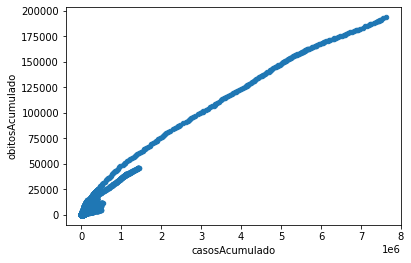

In [410]:
ax1 = df.plot.scatter(x='casosAcumulado',y='obitosAcumulado')

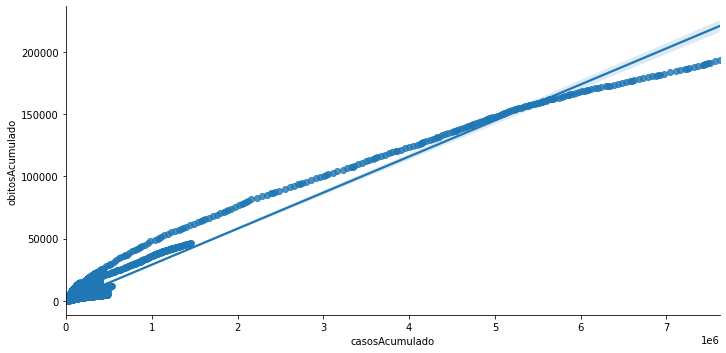

In [415]:
ax = sns.lmplot(data=df, x="casosAcumulado", y="obitosAcumulado", aspect=2, ci=100)

# Modelo de Regressão Linear

In [419]:
X = pd.DataFrame(df.iloc[:,10:12]).values
y = pd.DataFrame(df.iloc[:,12]).values

lin = LinearRegression().fit(X, y)

print("Accuracy: ", lin.score(X, y))
print("Intercept: ",lin.intercept_ )
print("Coef:",lin.coef_ )

Accuracy:  0.9788444554741917
Intercept:  [0.97792099]
Coef: [[0.02649665 0.38857733]]


In [420]:
X

array([[     0,      0],
       [     1,      1],
       [     1,      0],
       ...,
       [249736,   1193],
       [250457,    721],
       [251135,    678]])

In [421]:
y

array([[   0],
       [   0],
       [   0],
       ...,
       [4223],
       [4241],
       [4248]])

In [426]:
from sklearn.model_selection import train_test_split

test_size = 0.3  # taxa de amostras/exemplos que serão amostras de teste ==> neste caso, 30%
semente = 999  # semente usada durante a escolha aleatória das amostras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=semente)

In [427]:
X.shape, y.shape

((1568570, 2), (1568570, 1))

In [428]:
X_train.shape, y_train.shape

((1097999, 2), (1097999, 1))

In [429]:
X_test.shape, y_test.shape

((470571, 2), (470571, 1))

In [431]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)  # fit == ajustar

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [432]:
y_test


array([[24],
       [17],
       [ 1],
       ...,
       [ 0],
       [ 0],
       [ 1]])

In [433]:
y_test_pred = regressor.predict(X_test)
y_test_pred

array([[34.07607942],
       [10.86316524],
       [ 1.79023193],
       ...,
       [ 0.91477345],
       [ 1.04741868],
       [ 1.89041291]])

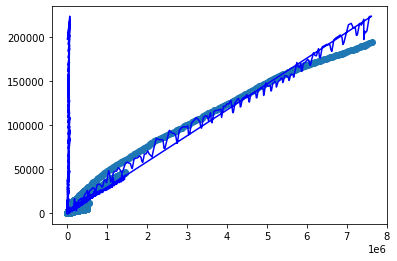

In [439]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X[:,0], y)
plt.plot(X, regressor.predict(X), color = 'b')

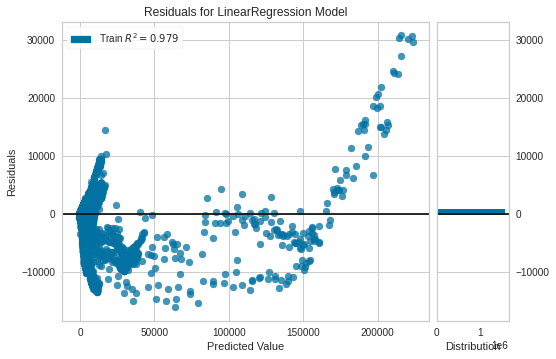

In [442]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(lin)
visualizador.fit(X, y)
visualizador.poof()